#### Read libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load data

In [2]:
df_products = pd.read_csv("../Datasets/clean_products.csv", index_col=0)
df_products = df_products[['ProductID', 'ProductName']]

In [3]:
all_errors_high_demand_A = pd.read_csv("../Datasets/all_errors_high_demand_A.csv", index_col=0)
all_predictions_high_demand_A = pd.read_csv("../Datasets/all_predictions_high_demand_A.csv", index_col=0)
all_errors_high_demand_B = pd.read_csv("../Datasets/all_errors_high_demand_B.csv", index_col=0)
all_predictions_high_demand_B = pd.read_csv("../Datasets/all_predictions_high_demand_B.csv", index_col=0)
all_errors_high_demand_C = pd.read_csv("../Datasets/all_errors_high_demand_C.csv", index_col=0)
all_predictions_high_demand_C = pd.read_csv("../Datasets/all_predictions_high_demand_C.csv", index_col=0)
all_errors_low_demand_A = pd.read_csv("../Datasets/all_errors_low_demand_A.csv", index_col=0)
all_predictions_low_demand_A = pd.read_csv("../Datasets/all_predictions_low_demand_A.csv", index_col=0)
all_errors_low_demand_B = pd.read_csv("../Datasets/all_errors_low_demand_B.csv", index_col=0)
all_predictions_low_demand_B = pd.read_csv("../Datasets/all_predictions_low_demand_B.csv", index_col=0)
all_errors_low_demand_C = pd.read_csv("../Datasets/all_errors_low_demand_C.csv", index_col=0)
all_predictions_low_demand_C = pd.read_csv("../Datasets/all_predictions_low_demand_C.csv", index_col=0)

In [4]:
all_errors_high_demand_A

,ProductID,Modelo,MAE,MSE,RMSE,MAPE,Predictions
0,427,ARIMA,2.662351,8.636406,2.938776,53.271035,"[4.285670310183115, 4.014562069545422, 3.70004..."
1,427,SARIMAX,6.650230,66.483076,8.153715,133.397628,"[14.211439173890396, 10.374345405398092, 22.71..."
2,427,Prophet,5.488272,49.039291,7.002806,109.943951,"[9.105569583330341, 2.9803953334972757, 1.4971..."
3,861,ARIMA,1.458275,3.122433,1.767041,76.643625,"[2.8035393455488316, 2.474476960258249, 2.1672..."
4,861,SARIMAX,3.763227,18.200776,4.266237,240.866376,"[4.039565585049935, 4.640193918057506, 2.13900..."
...,...,...,...,...,...,...,...
259,737,SARIMAX,0.502812,0.277387,0.526675,16.760412,"[2.731987843589961, 2.44896827477157, 2.409736..."
260,737,Prophet,0.893685,0.831226,0.911716,29.789510,"[2.3956370524849757, 2.347416662311776, 2.2991..."
261,637,ARIMA,0.345648,0.147578,0.384158,34.564832,"[0.9079668689241314, 0.8392517021808932, 0.764..."
262,637,SARIMAX,1.593621,2.886409,1.698943,159.362136,"[0.4227550952103576, 0.053364743028165684, -0...."


In [5]:
all_predictions_high_demand_A

,ProductID,QuantitySold,EMA,ARIMA_Pred,SARIMAX_pred,Prophet_Pred
0,427,4.857143,0,4.285670,14.211439,9.105570
1,427,5.000000,0,4.014562,10.374345,2.980395
2,427,5.000000,0,3.700042,22.716741,1.497143
3,427,5.000000,0,3.397487,18.613228,7.151304
4,427,5.000000,0,3.091635,14.082778,15.805078
...,...,...,...,...,...,...
1040,637,1.000000,0,0.691502,-0.572119,2.733194
1041,637,1.000000,0,0.617997,-0.785911,2.716504
1042,637,1.000000,0,0.544587,-0.993054,2.699814
1043,637,1.000000,0,0.471154,-1.197035,2.683124


### Select error

- **MAE (Error absoluto medio)**: Indica el error promedio en unidades de los datos originales. Este no penaliza mucho los errores grandes. 

$$

MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |


$$

- **MSE (Error cuadrático medio)**: Penaliza los errores grandes al elevarlos al cuadrado --> lo que puede hacer que parezca más alto. 

$$

MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2

$$

- **RMSE (Raíz del Error Cuadrático medio)**: Similar al *MSE* pero en la misma unidad que los datos originales. Penaliza errores grandes. 

$$

RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}

$$

- **MAPE (Error Porcentual Absoluto Medio)**: Expresa el error en porcentake, útil cuando las unidades de los datos varían. Puede ser problemático si hay valores cercanos a cero. 

$$

MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|

$$


In [6]:
all_errors_high_demand_A.dropna(inplace=True)

In [7]:
all_predictions_high_demand_A

,ProductID,QuantitySold,EMA,ARIMA_Pred,SARIMAX_pred,Prophet_Pred
0,427,4.857143,0,4.285670,14.211439,9.105570
1,427,5.000000,0,4.014562,10.374345,2.980395
2,427,5.000000,0,3.700042,22.716741,1.497143
3,427,5.000000,0,3.397487,18.613228,7.151304
4,427,5.000000,0,3.091635,14.082778,15.805078
...,...,...,...,...,...,...
1040,637,1.000000,0,0.691502,-0.572119,2.733194
1041,637,1.000000,0,0.617997,-0.785911,2.716504
1042,637,1.000000,0,0.544587,-0.993054,2.699814
1043,637,1.000000,0,0.471154,-1.197035,2.683124


In [8]:
def select_model(df, metrica= 'MAE'):
    
    best_sol = df.loc[df.groupby('ProductID')[metrica].idxmin()]
    
    return best_sol

In [9]:
all_predictions_high_demand_A.columns

Index(['ProductID', 'QuantitySold', 'EMA', 'ARIMA_Pred', 'SARIMAX_pred',
       'Prophet_Pred'],
      dtype='object')

In [10]:
def select_predictions(df, model):
    
    if (model == 'Prophet'):
        
        return df[['ProductID', 'QuantitySold', 'Prophet_Pred']], 'Prophet_Pred'
    
    elif (model == 'ARIMA'):
        
        return df[['ProductID', 'QuantitySold', 'ARIMA_Pred']], 'ARIMA_Pred'
    
    else:
        
        return df[['ProductID', 'QuantitySold', 'SARIMAX_pred']], 'SARIMAX_pred'
        

In [11]:
def select_best_predictions(df_errors, df_predictions, metrica='MAE'):
  
    best_models = select_model(df_errors, metrica)
    
    
    result_df = pd.DataFrame(columns=['ProductID', 'Modelo', 'QuantitySold', 'Predictions'])

    
    for _, row in best_models.iterrows():
        product_id = row['ProductID']
        model = row['Modelo']
        
        
        selected_predictions, name = select_predictions(df_predictions, model)
        
        
        product_predictions = selected_predictions[selected_predictions['ProductID'] == product_id]
        
        
        for _, pred_row in product_predictions.iterrows():
            new_row = pd.DataFrame({'ProductID': [product_id], 
                                    'Modelo': [model], 
                                    'QuantitySold': [pred_row['QuantitySold']], 
                                    'Predictions': [pred_row[name]]})
            
            result_df = pd.concat([result_df, new_row], ignore_index=True)

    return result_df


In [13]:
def metricas_stock(df):
    # Calcular las métricas agrupadas por ProductID
    df1 = df.groupby('ProductID').agg(
        min_stock=('Predictions', 'min'),
        max_stock=('Predictions', 'max'),
        mean_stock=('Predictions', 'mean')
    ).reset_index()
    
    # Calcular min_stock_1_2 y max_stock_1_2
    df1['min_stock_1_2'] = df1['min_stock'] * 0.8
    df1['max_stock_1_2'] = df1['min_stock'] * 1.2
    
    # Aplicar el redondeo hacia arriba
    df1['min_stock'] = np.ceil(df1['min_stock'])
    df1['max_stock'] = np.ceil(df1['max_stock'])
    df1['mean_stock'] = np.ceil(df1['mean_stock'])
    df1['min_stock_1_2'] = np.ceil(df1['min_stock_1_2'])
    df1['max_stock_1_2'] = np.ceil(df1['max_stock_1_2'])
    
    # Ajustar los valores menores que 0 a 0
    df1['min_stock'] = np.maximum(df1['min_stock'], 0)
    df1['max_stock'] = np.maximum(df1['max_stock'], 0)
    df1['mean_stock'] = np.maximum(df1['mean_stock'], 0)
    df1['min_stock_1_2'] = np.maximum(df1['min_stock_1_2'], 0)
    df1['max_stock_1_2'] = np.maximum(df1['max_stock_1_2'], 0)
    
    return df1


In [14]:
df_A = select_best_predictions(all_errors_high_demand_A, all_predictions_high_demand_A, metrica='MSE')
df_A


C:\Users\Carlota\AppData\Local\Temp\ipykernel_17568\2165314546.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


,ProductID,Modelo,QuantitySold,Predictions
0,5,Prophet,5.625,6.297691
1,5,Prophet,6.250,6.240716
2,5,Prophet,6.875,6.183742
3,5,Prophet,7.500,6.126767
4,5,Prophet,8.125,6.069792
...,...,...,...,...
1037,2686,ARIMA,1.000,0.964536
1038,2686,ARIMA,1.000,0.956164
1039,3464,ARIMA,5.000,5.000004
1040,3464,ARIMA,5.000,5.000007


In [15]:
df_A_m = metricas_stock(df_A)
df_A_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,5,6.0,7.0,7.0,5.0,8.0
1,33,8.0,11.0,10.0,7.0,10.0
2,45,1.0,3.0,1.0,1.0,1.0
3,61,9.0,10.0,10.0,8.0,11.0
4,66,8.0,9.0,9.0,6.0,9.0
...,...,...,...,...,...,...
82,2087,1.0,1.0,1.0,1.0,2.0
83,2463,5.0,5.0,5.0,4.0,6.0
84,2464,3.0,4.0,3.0,3.0,4.0
85,2686,1.0,1.0,1.0,1.0,2.0


In [16]:
df_A_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,5,6.0,7.0,7.0,5.0,8.0
1,33,8.0,11.0,10.0,7.0,10.0
2,45,1.0,3.0,1.0,1.0,1.0
3,61,9.0,10.0,10.0,8.0,11.0
4,66,8.0,9.0,9.0,6.0,9.0
...,...,...,...,...,...,...
82,2087,1.0,1.0,1.0,1.0,2.0
83,2463,5.0,5.0,5.0,4.0,6.0
84,2464,3.0,4.0,3.0,3.0,4.0
85,2686,1.0,1.0,1.0,1.0,2.0


In [23]:
def plot_max_min_product(df):
    
    df = df.merge(df_products, on = 'ProductID')
    
    
    fig, ax = plt.subplots(figsize=(15, 10))  # Aumentar el tamaño de la figura

    # Establecer el ancho de las barras
    bar_width = 0.35
    index = range(len(df))

    min_stock_color = '#1f77b4'  # Azul oscuro
    max_stock_color = '#2ca02c'  # Verde azulado
    
    min_stock_color = '#007BFF'  # Azul eléctrico
    max_stock_color = '#77DD77'  # Verde menta pastel
    
    
    # Graficar los valores mínimos y máximos para cada producto
    bar1 = ax.bar(index, df['min_stock_1_2'], bar_width, label='min stock', color=min_stock_color)
    bar2 = ax.bar([i + bar_width for i in index], df['max_stock_1_2'], bar_width, label='max stock', color=max_stock_color)

    # Etiquetas y títulos
    ax.set_xlabel('Product Name')
    ax.set_ylabel('Stock')
    ax.set_title('Minimum and maximum values for stock by product')

    # Posicionar etiquetas y rotarlas
    ax.set_xticks([i + bar_width / 2 for i in index])  # Posicionar etiquetas de los productos
    ax.set_xticklabels(df['ProductName'], rotation=45, ha='right')  # Rotar etiquetas

    # Ajustar el espaciado entre las barras
    plt.tight_layout()  # Asegurar que los elementos del gráfico no se solapen

    # Añadir leyenda
    ax.legend()

    # Mostrar gráfico
    plt.show()

In [18]:
df_A_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,5,6.0,7.0,7.0,5.0,8.0
1,33,8.0,11.0,10.0,7.0,10.0
2,45,1.0,3.0,1.0,1.0,1.0
3,61,9.0,10.0,10.0,8.0,11.0
4,66,8.0,9.0,9.0,6.0,9.0
...,...,...,...,...,...,...
82,2087,1.0,1.0,1.0,1.0,2.0
83,2463,5.0,5.0,5.0,4.0,6.0
84,2464,3.0,4.0,3.0,3.0,4.0
85,2686,1.0,1.0,1.0,1.0,2.0


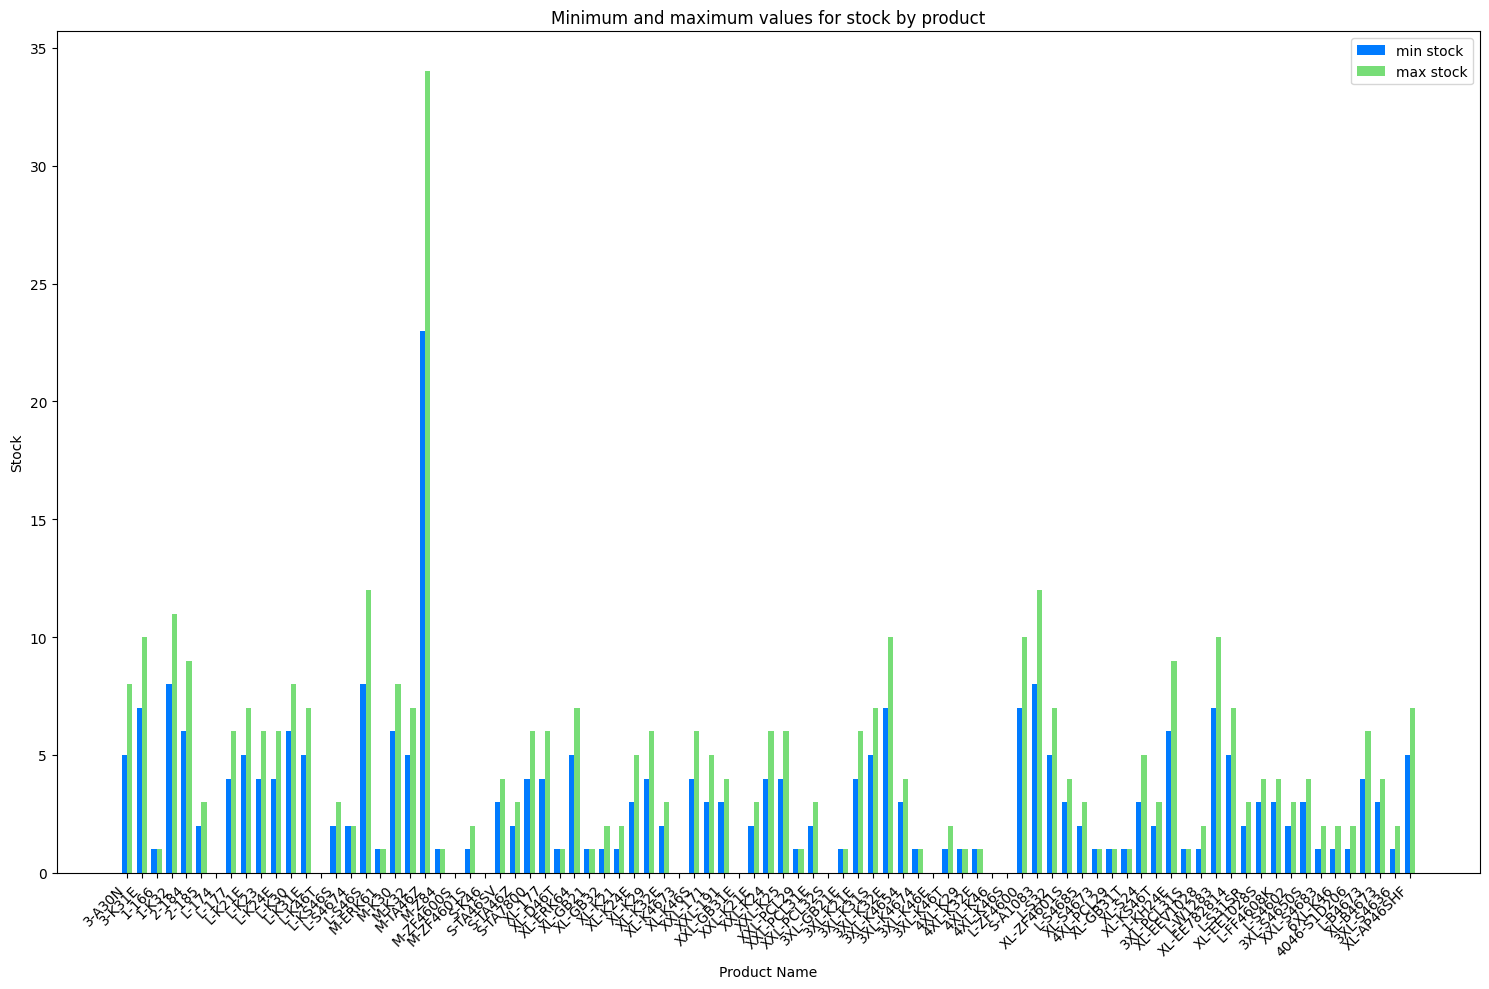

In [25]:
plot_max_min_product(df_A_m)

In [26]:
all_errors_high_demand_B.dropna(inplace=True)
all_errors_high_demand_B.isna().sum()

ProductID      0
Modelo         0
MAE            0
MSE            0
RMSE           0
MAPE           0
Predictions    0
dtype: int64

In [27]:
df_B = select_best_predictions(all_errors_high_demand_B, all_predictions_high_demand_B, metrica='MSE')
df_B

C:\Users\Carlota\AppData\Local\Temp\ipykernel_17568\2165314546.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


,ProductID,Modelo,QuantitySold,Predictions
0,79,Prophet,5.0,5.003292
1,79,Prophet,5.0,5.036878
2,79,Prophet,5.0,5.070464
3,79,Prophet,5.0,5.104050
4,79,Prophet,5.0,5.137636
...,...,...,...,...
775,3539,ARIMA,1.0,1.000000
776,3608,ARIMA,1.0,0.999961
777,3608,ARIMA,1.0,0.999934
778,3608,ARIMA,1.0,0.999903


In [28]:
df_B_m = metricas_stock(df_B)
df_B_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,79,6.0,6.0,6.0,5.0,7.0
1,133,3.0,3.0,3.0,2.0,3.0
2,164,88.0,121.0,104.0,70.0,105.0
3,264,6.0,6.0,6.0,5.0,7.0
4,282,5.0,6.0,6.0,4.0,6.0
...,...,...,...,...,...,...
106,3527,3.0,3.0,3.0,3.0,4.0
107,3538,2.0,2.0,2.0,2.0,3.0
108,3539,1.0,1.0,1.0,1.0,2.0
109,3608,1.0,1.0,1.0,1.0,2.0


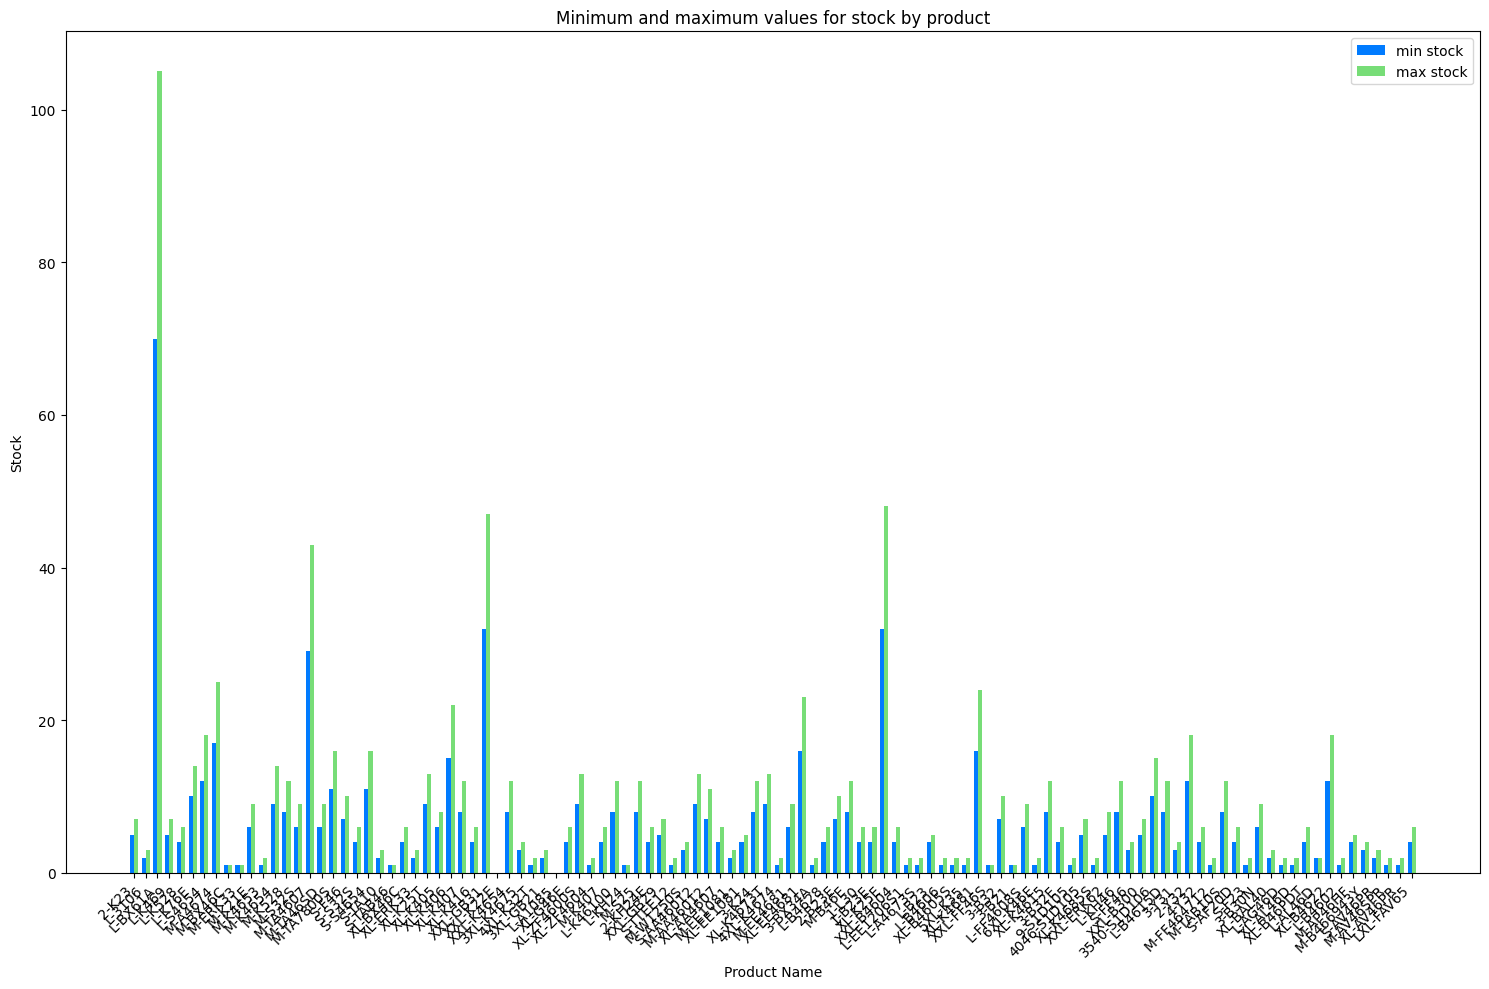

In [29]:
plot_max_min_product(df_B_m)

In [30]:
all_errors_high_demand_C.isna().sum()

ProductID      0
Modelo         0
MAE            0
MSE            0
RMSE           0
MAPE           0
Predictions    0
dtype: int64

In [31]:
df_C = select_best_predictions(all_errors_high_demand_C, all_predictions_high_demand_C, metrica='MSE')
df_C

C:\Users\Carlota\AppData\Local\Temp\ipykernel_17568\2165314546.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


,ProductID,Modelo,QuantitySold,Predictions
0,130,SARIMAX,3.0,2.944854
1,130,SARIMAX,3.0,2.886953
2,130,SARIMAX,3.0,2.904941
3,130,SARIMAX,3.0,2.920771
4,130,SARIMAX,3.0,2.934727
...,...,...,...,...
62,1111,Prophet,1.0,4.406520
63,1111,Prophet,1.0,4.327490
64,3226,ARIMA,1.2,1.200000
65,3226,ARIMA,1.0,1.000000


In [32]:
df_C_m = metricas_stock(df_C)
df_C_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,130,3.0,3.0,3.0,3.0,4.0
1,132,27.0,38.0,32.0,21.0,32.0
2,158,21.0,21.0,21.0,17.0,25.0
3,336,6.0,6.0,6.0,5.0,8.0
4,348,5.0,5.0,5.0,4.0,6.0
5,611,1.0,1.0,1.0,1.0,2.0
6,671,5.0,5.0,5.0,4.0,6.0
7,795,10.0,10.0,10.0,8.0,12.0
8,1111,5.0,5.0,5.0,4.0,6.0
9,3226,1.0,2.0,1.0,1.0,1.0


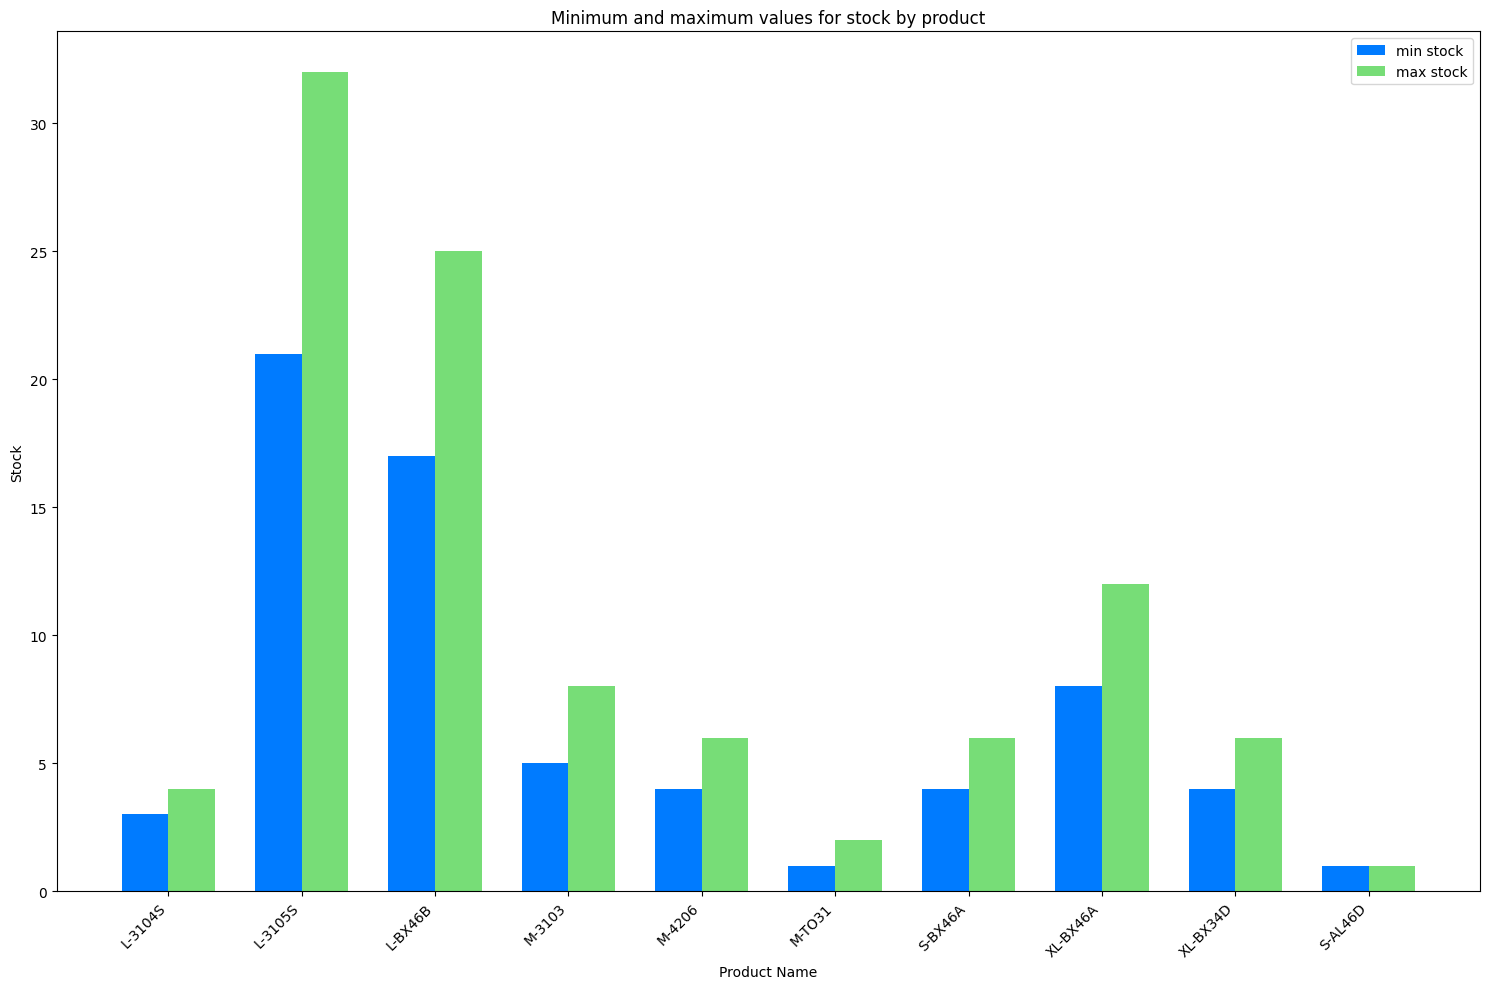

In [33]:
plot_max_min_product(df_C_m)

In [34]:
all_errors_low_demand_A.isna().sum()

ProductID      0
Modelo         0
MAE            0
MSE            0
RMSE           0
MAPE           0
Predictions    0
dtype: int64

In [35]:
all_errors_low_demand_A

,ProductID,Modelo,MAE,MSE,RMSE,MAPE,Predictions
0,771,EMA,3.093934,10.450528,3.232728,69.740124,"[1.2242476300159217, 1.2242476300159217, 1.224..."
1,3,EMA,0.023931,0.000573,0.023931,inf,"[0.02393098993221513, 0.02393098993221513, 0.0..."


In [36]:
all_predictions_low_demand_A

,ProductID,QuantitySold,EMA,ARIMA_Pred,SARIMAX_pred,Prophet_Pred
0,771,2.272727,1.224248,0,0,0
1,771,2.727273,1.224248,0,0,0
2,771,3.181818,1.224248,0,0,0
3,771,3.636364,1.224248,0,0,0
4,771,4.090909,1.224248,0,0,0
5,771,4.545455,1.224248,0,0,0
6,771,5.000000,1.224248,0,0,0
7,771,5.000000,1.224248,0,0,0
8,771,5.000000,1.224248,0,0,0
9,771,5.000000,1.224248,0,0,0


In [37]:
def select_predictions_low_demand(df):
    df1 = df[['ProductID', 'QuantitySold', 'EMA']]
    df1 = df1.rename(columns={'EMA': 'Predictions'})
    return df1


In [38]:
dfA_l = select_predictions_low_demand(all_predictions_low_demand_A)
dfA_l

,ProductID,QuantitySold,Predictions
0,771,2.272727,1.224248
1,771,2.727273,1.224248
2,771,3.181818,1.224248
3,771,3.636364,1.224248
4,771,4.090909,1.224248
5,771,4.545455,1.224248
6,771,5.000000,1.224248
7,771,5.000000,1.224248
8,771,5.000000,1.224248
9,771,5.000000,1.224248


In [39]:
dA_l_m = metricas_stock(dfA_l)
dA_l_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,3,1.0,1.0,1.0,1.0,1.0
1,771,2.0,2.0,2.0,1.0,2.0


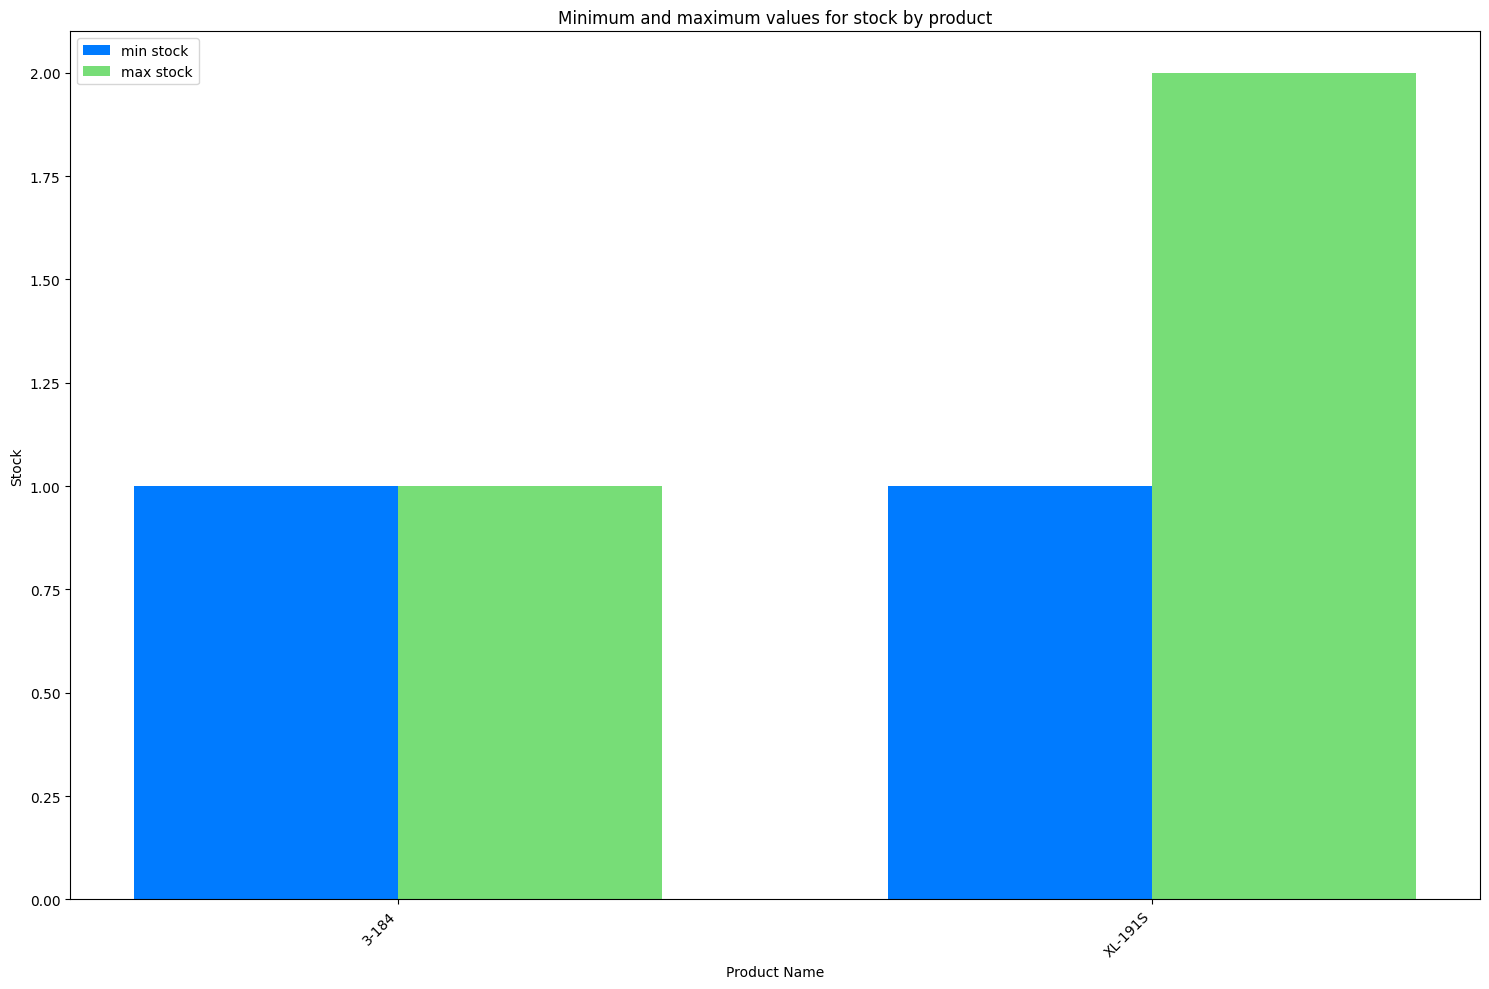

In [40]:
plot_max_min_product(dA_l_m)

In [41]:
all_predictions_low_demand_B.isna().sum()

ProductID        0
QuantitySold    41
EMA             44
ARIMA_Pred       0
SARIMAX_pred     0
Prophet_Pred     0
dtype: int64

In [42]:
all_errors_low_demand_B.dropna(inplace=True)

In [43]:
dfB_l = select_predictions_low_demand(all_predictions_low_demand_B)
dfB_l

,ProductID,QuantitySold,Predictions
0,332,2.272727,1.124557
1,332,2.727273,1.124557
2,332,3.181818,1.124557
3,332,3.636364,1.124557
4,332,4.090909,1.124557
...,...,...,...
712,2485,5.000000,4.808798
713,2876,2.000000,2.415981
714,2876,2.000000,2.415981
715,2876,2.000000,2.415981


In [44]:
dfB_l_m = metricas_stock(dfB_l)
dfB_l_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,10,3.0,3.0,3.0,3.0,4.0
1,12,6.0,6.0,6.0,5.0,7.0
2,167,2.0,2.0,2.0,2.0,3.0
3,174,2.0,2.0,2.0,1.0,2.0
4,212,3.0,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...
92,3406,5.0,5.0,5.0,4.0,6.0
93,3520,2.0,2.0,2.0,1.0,2.0
94,3540,NaN,NaN,NaN,NaN,NaN
95,3549,3.0,3.0,3.0,2.0,3.0


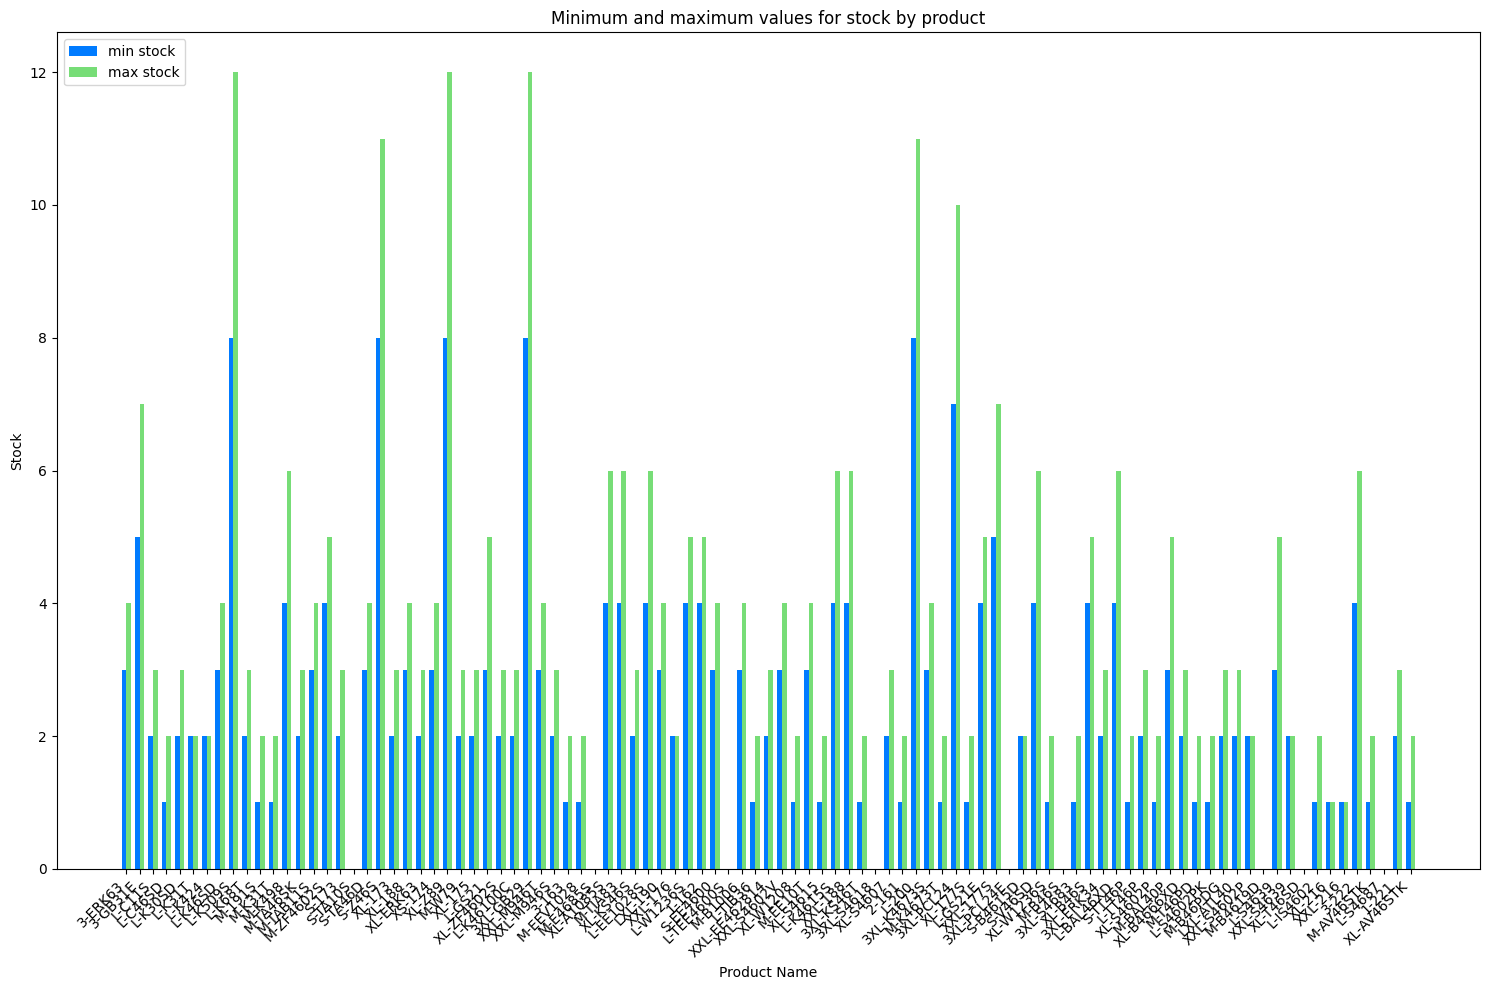

In [45]:
plot_max_min_product(dfB_l_m)

In [46]:
all_predictions_low_demand_C.isna().sum()

ProductID        0
QuantitySold    37
EMA             39
ARIMA_Pred       0
SARIMAX_pred     0
Prophet_Pred     0
dtype: int64

In [47]:
all_predictions_low_demand_C.dropna(inplace=True)

In [48]:
dfC_l = select_predictions_low_demand(all_predictions_low_demand_C)
dfC_l

,ProductID,QuantitySold,Predictions
0,2758,5.0,6.864793
1,2758,5.0,6.864793
2,2758,5.0,6.864793
3,2831,10.0,9.932059
4,2831,10.0,9.932059
...,...,...,...
413,109,7.0,7.000000
414,109,7.0,7.000000
415,109,7.0,7.000000
416,109,7.0,7.000000


In [49]:
dfC_l_m = metricas_stock(dfC_l)
dfC_l_m

,ProductID,min_stock,max_stock,mean_stock,min_stock_1_2,max_stock_1_2
0,109,7.0,7.0,7.0,6.0,9.0
1,121,1.0,1.0,1.0,1.0,2.0
2,147,2.0,2.0,2.0,1.0,2.0
3,176,1.0,1.0,1.0,1.0,2.0
4,238,6.0,6.0,6.0,5.0,7.0
...,...,...,...,...,...,...
76,3452,1.0,1.0,1.0,1.0,2.0
77,3463,3.0,3.0,3.0,3.0,4.0
78,3474,3.0,3.0,3.0,3.0,4.0
79,3606,2.0,2.0,2.0,1.0,2.0


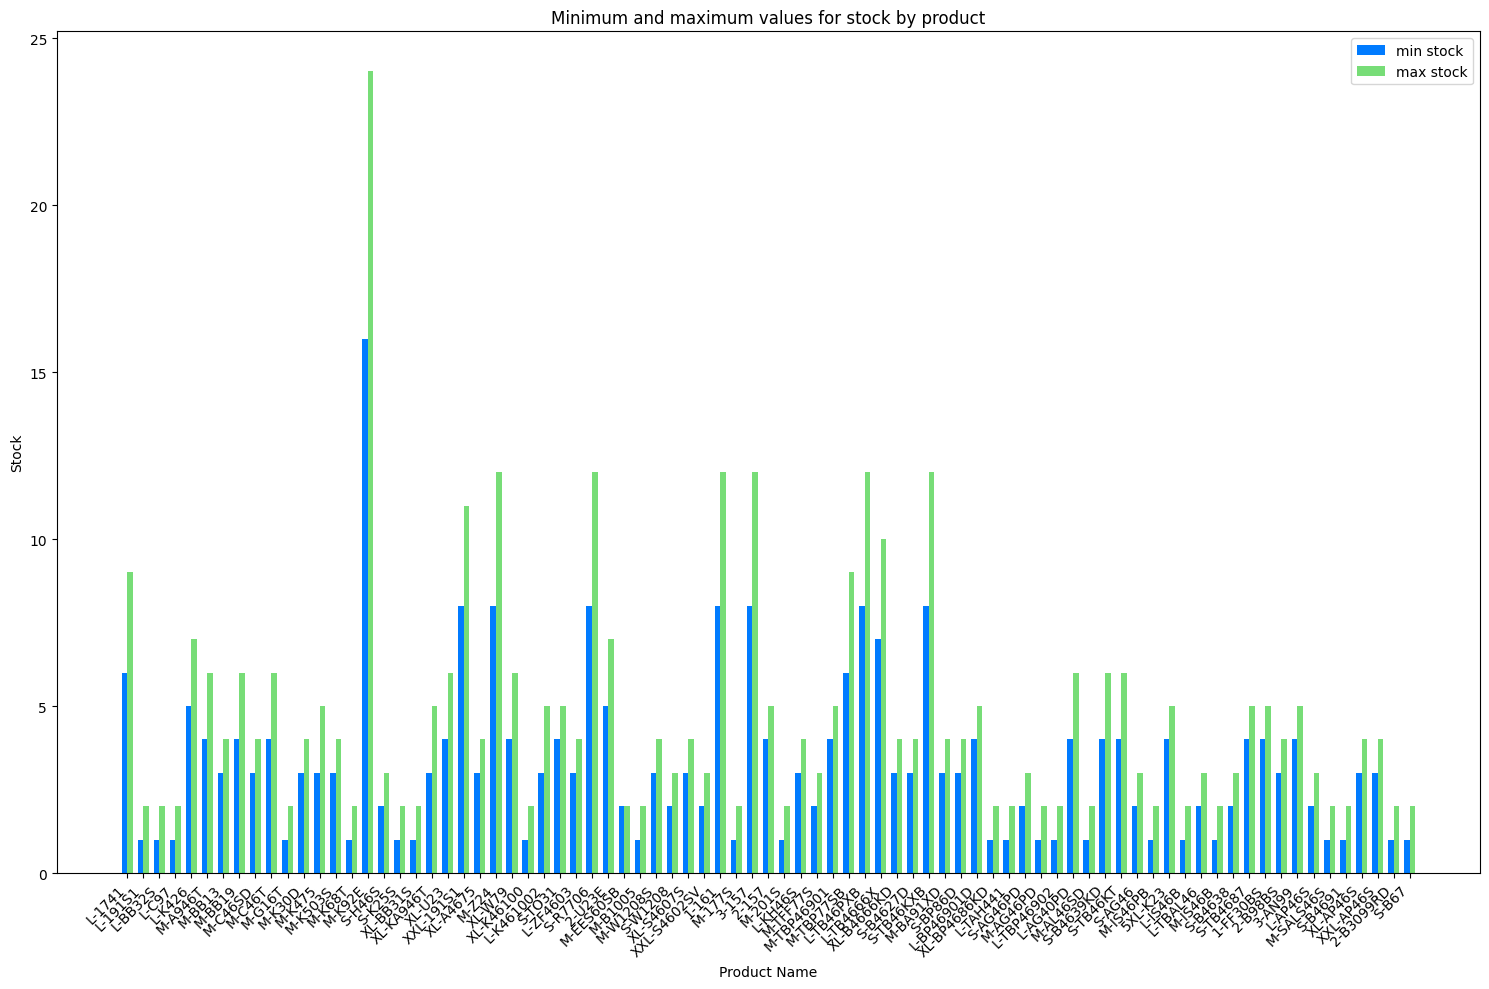

In [50]:
plot_max_min_product(dfC_l_m)